> **ALGORITMO DE MACHINE LEARNING: BOSQUE ALEATORIO**
---

Aplicación del algoritmo de Bosque Aleatorio para obtener el valor de la ganancia de retroalimentación de la velocidad angular del motor en base a la inercia total sumado de la inercia del motor y la carga.

> Importación y Análisis de Data
---

In [1]:
#IMPORTAR LIBRERÍA
import pandas as pd                                     # LIBRERÍA PARA DATAFRAMES
import numpy as np                                      # LIBRERÍA PARA MATRICES
import os                                               # LIBRERÍA PARA OPERACIONES CON EL SISTEMA OPERATIVO
import matplotlib.pyplot as plt                         # LIBRERÍA PARA GRÁFICAS 2D
import random as rdm                                    # LIBRERÍA PARA GENERACIÓN ALEATORIA
from sklearn import model_selection                     # LIBRERÍA PARA SEPARAR DATA EN ENTRENAMIENTO Y VALIDACIÓN
from sklearn.ensemble import RandomForestRegressor      # LIBRERÍA PARA IMPLEMENTAR REGRESIÓN POR BOSQUE ALEATORIO
from sklearn.model_selection import KFold               # LIBRERÍA PARA DIVIDIR LA DATA EN N-FOLD O SUBCONJUNTOS DE TESTING DIFERENTES
from sklearn.model_selection import cross_val_score     # LIBRERÍA PARA OBTENER LA CORRELACIÓN POR VALIDACIÓN CRUZADA
from sklearn.metrics import mean_squared_error          # LIBRERÍA PARA HALLAR EL ERROR CUADRÁTICO MEDIO
from sklearn.externals import joblib                    # LIBRERÍA PARA EXPORTAR MODELO DE MACHINE LEARNING
from ipykernel import kernelapp as app

from google.colab import drive          # LIBRERÍA PARA IMPORTAR DESDE GOOGLE DRIVE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
%matplotlib inline

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#LEER ARCHIVO EXCEL (.xlsx)
mainpath = "drive/My Drive/DATASET"
filenameDatos = "PP_CONTROL_MOTOR_DC/Dataset_Motor.xlsx"
fullpathDatos = os.path.join(mainpath,filenameDatos)

data = pd.read_excel(fullpathDatos)

#Mostrar Datos
data

,Inercia_Total,Ganancia_Corriente,Ganancia_Velocidad
0,0.023718,0.107391,17.512910
1,0.023765,0.107391,17.549938
2,0.023812,0.107391,17.586966
3,0.023859,0.107391,17.623995
4,0.023907,0.107391,17.661023
...,...,...,...
1995,0.117811,2.026651,27828.389339
1996,0.117859,1.415655,13640.427254
1997,0.117906,2.026651,27850.673436
1998,0.117953,2.026651,27861.815484


In [6]:
data = data[data["Inercia_Total"] <= 0.08]
data

,Inercia_Total,Ganancia_Corriente,Ganancia_Velocidad
0,0.023718,0.107391,17.512910
1,0.023765,0.107391,17.549938
2,0.023812,0.107391,17.586966
3,0.023859,0.107391,17.623995
4,0.023907,0.107391,17.661023
...,...,...,...
1189,0.079797,0.229605,259.688392
1190,0.079844,0.229605,259.842612
1191,0.079891,0.229605,259.996832
1192,0.079938,0.229605,260.151053


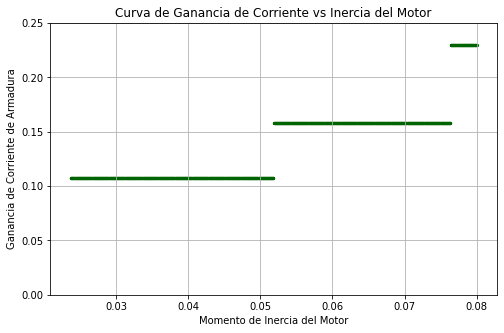

In [7]:
#GRÁFICA DE LA GANANCIA DE LA CORRIENTE VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.scatter(data.Inercia_Total, data.Ganancia_Corriente, c = "darkgreen", s = 5)
plt.ylim([0,0.25])
plt.title("Curva de Ganancia de Corriente vs Inercia del Motor")
plt.xlabel("Momento de Inercia del Motor")
plt.ylabel("Ganancia de Corriente de Armadura")
plt.grid()
plt.show()

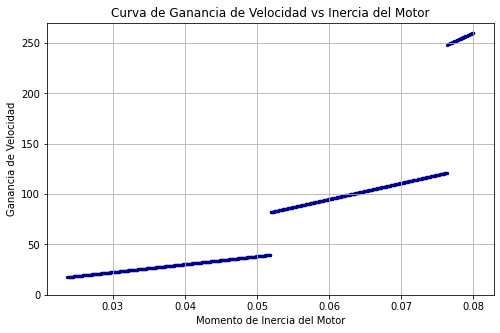

In [8]:
#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.scatter(data.Inercia_Total, data.Ganancia_Velocidad, c = "darkblue", s = 5)
plt.ylim([0,270])
plt.title("Curva de Ganancia de Velocidad vs Inercia del Motor")
plt.xlabel("Momento de Inercia del Motor")
plt.ylabel("Ganancia de Velocidad")
plt.grid()
plt.show()

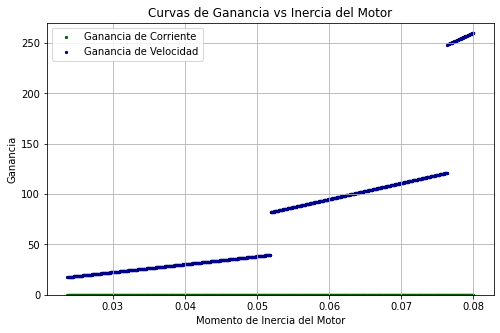

In [9]:
#GRÁFICA DE LA GANANCIA VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.scatter(data.Inercia_Total, data.Ganancia_Corriente, c = "darkgreen", label = "Ganancia de Corriente", s = 5)
plt.scatter(data.Inercia_Total, data.Ganancia_Velocidad, c = "darkblue", label = "Ganancia de Velocidad", s = 5)
plt.ylim([0,270])
plt.title("Curvas de Ganancia vs Inercia del Motor")
plt.xlabel("Momento de Inercia del Motor")
plt.ylabel("Ganancia")
plt.grid()
plt.legend()
plt.show()

> # 1. GANANCIA VELOCIDAD


> Separar Datos en Conjuntos de Entrenamiento y Validación
---

In [10]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
caracteristica = ["Inercia_Total"]
objetivo = ["Ganancia_Velocidad"]

X = data[caracteristica]
Y = data[objetivo]

In [11]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.25, random_state = 0)

> Entrenamiento del Bosque Aleatorio y Validación de sus Parámetros
---

Las variable predictora es:  Inercia_Total


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Para una cantidad de árboles de  10  el mse es:  13.420092673139251


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  30  el mse es:  14.964059001674727


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  50  el mse es:  15.44924193742672


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  70  el mse es:  13.696652890365566


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  90  el mse es:  13.85636752065875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  110  el mse es:  14.453504558506111


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  130  el mse es:  15.539522048987058


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  150  el mse es:  15.241014439007813


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  170  el mse es:  15.601221874053817


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  190  el mse es:  15.839439489530516


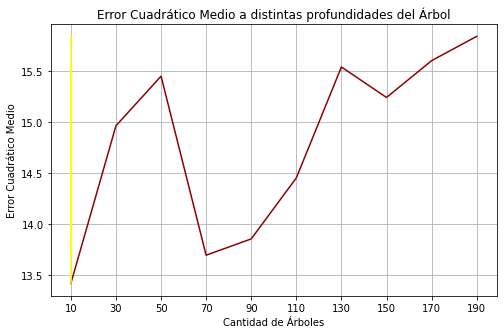

In [19]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES DE ÁRBOLES

print("Las variable predictora es: ", caracteristica[0])

# PRUEBA DE LA CANTIDAD DE ÁRBOLES
estimadoresMinimo = 10
estimadoresMaximo = 200+1
estimadoresPaso = 20

errorCuadraticoMedioList = []
estimadores = np.array(range(estimadoresMinimo,estimadoresMaximo,estimadoresPaso))

for estimador in range(estimadoresMinimo,estimadoresMaximo,estimadoresPaso):
  forest = RandomForestRegressor(n_jobs = 3, oob_score = True, n_estimators = estimador, random_state = 0)  #CREAR EL MODELO DE BOSQUE ALEATORIO OPTIMIZANDO LOS NODOS POR REDUCCIÓN DE VARIANZA
  forest.fit(X_train, Y_train)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 200 EN 200, PUES TENEMOS 2000 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(forest, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 3)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para una cantidad de árboles de ", estimador, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(estimadores, errorCuadraticoMedio, c = "darkred")
plt.plot(10*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas profundidades del Árbol")
plt.xlabel("Cantidad de Árboles")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(estimadores)
plt.grid()
plt.show()

In [20]:
# EL BOSQUE CON CON UN BUEN SCORE ES DE 90 ÁRBOLES
forest = RandomForestRegressor(n_jobs = 2, oob_score = True, n_estimators = 10)  #CREAR EL MODELO DE BOSQUE ALEATORIO OPTIMIZANDO LOS NODOS POR REDUCCIÓN DE VARIANZA
forest.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=2, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

> Validación del Modelo de Bosque Aleatorio
---

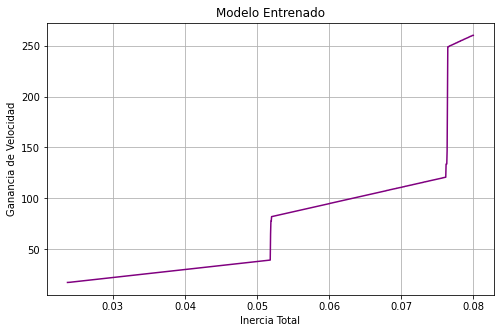

In [21]:
Y_predtotal = forest.predict(X)
#GRÁFICA DEL MODELO
plt.figure(figsize = (8,5))
plt.plot(X, Y_predtotal, c = "purple")
plt.title("Modelo Entrenado")
plt.xlabel("Inercia Total")
plt.ylabel("Ganancia de Velocidad")
plt.grid()
plt.show()

In [22]:
# ERROR CUADRÁTICO MEDIO
Y_pred = forest.predict(X_test)
MSE = mean_squared_error(Y_test,Y_pred)

# OOB SCORE
OOBS = forest.oob_score_
OOBS = OOBS*100

# ERROR ESTÁNDAR RESIDUAL
SSD = np.sum((Y_pred - np.transpose(Y_test.values))**2) #SSD                    #DIFERENCIA CUADRADO ENTRE LOS DATOS Y EL RESULTADO PREDICHO
RSE_prev = np.sqrt(SSD/(len(Y_test.values)-len(caracteristica)-1))   #HALLAR ERROR RESPECTO AL PROMEDIO
promedio = np.mean(Y_test.values)
RSE = RSE_prev/promedio

print("El error cuadrático medio es: ", MSE)
print("El oob score es: ", OOBS, "%")
print("El error estándar residual es: ", RSE)

El error cuadrático medio es:  0.003389738510458818
El oob score es:  97.42952676341177 %
El error estándar residual es:  0.0007345566703907093


> Exportar Modelo de Bosque Aleatorio
---

In [23]:
filenameModelo = "PP_CONTROL_MOTOR_DC/Motor_Regresion_Bosque_Velocidad.pkl"
fullpathModelo = os.path.join(mainpath,filenameModelo)

joblib.dump(forest,fullpathModelo)

['drive/My Drive/DATASET/PP_CONTROL_MOTOR_DC/Motor_Regresion_Bosque_Velocidad.pkl']

> # 2. GANANCIA CORRIENTE


> Separar Datos en Conjuntos de Entrenamiento y Validación
---

In [24]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
caracteristica = ["Inercia_Total"]
objetivo = ["Ganancia_Corriente"]

X = data[caracteristica]
Y = data[objetivo]

In [25]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.25, random_state = 0)

> Entrenamiento del Bosque Aleatorio y Validación de sus Parámetros
---

Las variable predictora es:  Inercia_Total


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Para una cantidad de árboles de  10  el mse es:  5.835197228403503e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  30  el mse es:  6.069529541201437e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  50  el mse es:  6.145879876001331e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  70  el mse es:  5.703583719818553e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  90  el mse es:  5.599536936619272e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  110  el mse es:  5.74617749970103e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  130  el mse es:  6.076144231798072e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  150  el mse es:  5.946187789224616e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  170  el mse es:  6.019087560788396e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  190  el mse es:  6.147096415269231e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  210  el mse es:  6.1733632097523625e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  230  el mse es:  6.172107623589916e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  250  el mse es:  6.1820602596184836e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  270  el mse es:  6.182085297001195e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Para una cantidad de árboles de  290  el mse es:  6.237010320206827e-06


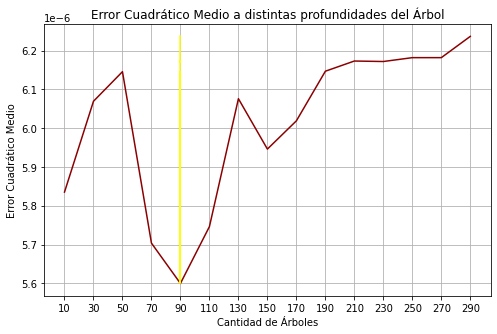

In [27]:
#VALIDACIÓN CRUZADA PARA VARIAS CANTIDADES DE ÁRBOLES

print("Las variable predictora es: ", caracteristica[0])

# PRUEBA DE LA CANTIDAD DE ÁRBOLES
estimadoresMinimo = 10
estimadoresMaximo = 300+1
estimadoresPaso = 20

errorCuadraticoMedioList = []
estimadores = np.array(range(estimadoresMinimo,estimadoresMaximo,estimadoresPaso))

for estimador in range(estimadoresMinimo,estimadoresMaximo,estimadoresPaso):
  forest = RandomForestRegressor(n_jobs = 3, oob_score = True, n_estimators = estimador, random_state = 0)  #CREAR EL MODELO DE BOSQUE ALEATORIO OPTIMIZANDO LOS NODOS POR REDUCCIÓN DE VARIANZA
  forest.fit(X_train, Y_train)

  #CREAR LOS DISTINTOS SUBCONJUNTOS DE ENTRENAMIENTO Y TESTING
  #10 SPLITS O SUBCONJUNTOS DE TESTING, ES DECIR DE 200 EN 200, PUES TENEMOS 2000 DATOS
  cv = KFold(n_splits = 10, shuffle = True, random_state = 0)
  scores = cross_val_score(forest, X, Y, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 3)
  errorCuadraticoMedioList.append(np.mean(scores)*(-1))
  print("Para una cantidad de árboles de ", estimador, " el mse es: ", np.mean(scores)*(-1))

errorCuadraticoMedio = np.array(errorCuadraticoMedioList)

#GRÁFICA DE LA GANANCIA DE LA VELOCIDAD VS INERCIA TOTAL
plt.figure(figsize = (8,5))
plt.plot(estimadores, errorCuadraticoMedio, c = "darkred")
plt.plot(90*np.ones_like(errorCuadraticoMedio),errorCuadraticoMedio, c = "yellow")
plt.title("Error Cuadrático Medio a distintas profundidades del Árbol")
plt.xlabel("Cantidad de Árboles")
plt.ylabel("Error Cuadrático Medio")
plt.xticks(estimadores)
plt.grid()
plt.show()

In [28]:
# EL BOSQUE CON CON UN BUEN SCORE ES DE 90 ÁRBOLES
forest = RandomForestRegressor(n_jobs = 2, oob_score = True, n_estimators = 90)  #CREAR EL MODELO DE BOSQUE ALEATORIO OPTIMIZANDO LOS NODOS POR REDUCCIÓN DE VARIANZA
forest.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=2, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

> Validación del Modelo de Bosque Aleatorio
---

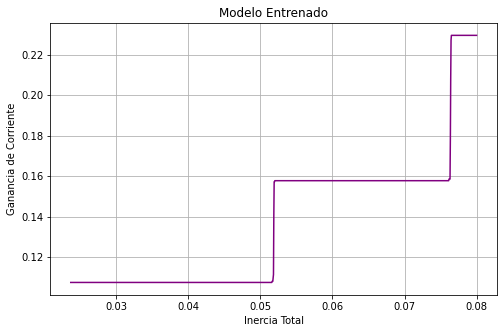

In [29]:
Y_predtotal = forest.predict(X)
#GRÁFICA DEL MODELO
plt.figure(figsize = (8,5))
plt.plot(X, Y_predtotal, c = "purple")
plt.title("Modelo Entrenado")
plt.xlabel("Inercia Total")
plt.ylabel("Ganancia de Corriente")
plt.grid()
plt.show()

In [30]:
# ERROR CUADRÁTICO MEDIO
Y_pred = forest.predict(X_test)
MSE = mean_squared_error(Y_test,Y_pred)

# OOB SCORE
OOBS = forest.oob_score_
OOBS = OOBS*100

# ERROR ESTÁNDAR RESIDUAL
SSD = np.sum((Y_pred - np.transpose(Y_test.values))**2) #SSD                    #DIFERENCIA CUADRADO ENTRE LOS DATOS Y EL RESULTADO PREDICHO
RSE_prev = np.sqrt(SSD/(len(Y_test.values)-len(caracteristica)-1))   #HALLAR ERROR RESPECTO AL PROMEDIO
promedio = np.mean(Y_test.values)
RSE = RSE_prev/promedio

print("El error cuadrático medio es: ", MSE)
print("El oob score es: ", OOBS, "%")
print("El error estándar residual es: ", RSE)

El error cuadrático medio es:  1.0361552304113215e-09
El oob score es:  99.20440123882747 %
El error estándar residual es:  0.00023165182696416707


> Exportar Modelo del Bosque Aleatorio
---

In [31]:
filenameModelo = "PP_CONTROL_MOTOR_DC/Motor_Regresion_Bosque_Corriente.pkl"
fullpathModelo = os.path.join(mainpath,filenameModelo)

joblib.dump(forest,fullpathModelo)

['drive/My Drive/DATASET/PP_CONTROL_MOTOR_DC/Motor_Regresion_Bosque_Corriente.pkl']